In [1]:
import gzip
import csv
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [35]:
#read lodes data
lehd_df = pd.read_csv('data\lodes\ca_wac_S000_JT00_2017.csv.gz',compression='gzip',header=0,sep=',',quotechar='"',error_bad_lines=False)
#convert w_geocode to string to make it easier to check
lehd_df['w_geocode'] = lehd_df['w_geocode'].astype(str)
# check if beginning of string matches SD county fips code
lehd_df = lehd_df[lehd_df['w_geocode'].str.match('6073')]
#add leading 0 to make consistent with block data(below)
#SDlehd_df.iloc[] = '0' + SDlehd_df.loc['w_geocode']
lehd_df['w_geocode'] = '0' + lehd_df['w_geocode']

In [36]:
lehd_df

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,CNS03,CNS04,CNS05,CNS06,CNS07,CNS08,CNS09,CNS10,CNS11,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20,CR01,CR02,CR03,CR04,CR05,CR07,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
174510,060730001001000,9,1,3,5,1,0,8,0,0,0,0,0,0,0,0,0,0,4,2,0,0,2,0,0,1,0,0,7,0,0,2,0,0,8,1,0,1,4,3,6,3,0,0,0,0,0,0,0,0,0,0,20190825
174511,060730001001003,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,20190825
174512,060730001001004,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,20190825
174513,060730001001010,4,0,0,4,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,4,0,0,0,0,0,2,2,2,0,1,1,2,2,0,0,0,0,0,0,0,0,0,0,20190825
174514,060730001001011,2,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,20190825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192210,060730221003012,8,0,5,3,3,2,3,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,4,0,0,0,0,6,0,0,2,0,0,4,4,1,2,4,1,0,8,0,0,0,0,0,0,0,0,0,0,20190825
192211,060730221003013,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,20190825
192212,060730221003014,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,20190825
192213,060730221003015,44,2,31,11,9,11,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0,39,0,1,3,1,0,35,9,3,4,16,19,11,33,0,0,0,0,0,0,0,0,0,0,20190825


In [37]:
# Lets get the shp data ready to be linked to the LODES data
sd_blocks = gpd.read_file('data\\blocks\\sd\\tl_2010_06073_tabblock10.shp')
sd_blocks

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,06,073,016902,1159,060730169021159,Block 1159,G5040,R,None,None,S,155475,0,+32.9028933,-116.9070116,"POLYGON ((-116.90485 32.90222, -116.90486 32.9..."
1,06,073,016902,1012,060730169021012,Block 1012,G5040,R,None,None,S,682684,0,+32.9608914,-116.8167736,"POLYGON ((-116.81117 32.96339, -116.81118 32.9..."
2,06,073,013310,2013,060730133102013,Block 2013,G5040,U,78661,U,S,7308,0,+32.6363816,-116.9703056,"POLYGON ((-116.97002 32.63583, -116.97013 32.6..."
3,06,073,016701,2009,060730167012009,Block 2009,G5040,U,78661,U,S,22568,0,+32.8435707,-116.9558789,"POLYGON ((-116.95483 32.84252, -116.95510 32.8..."
4,06,073,016902,1186,060730169021186,Block 1186,G5040,R,None,None,S,439184,0,+32.9292921,-116.8574745,"POLYGON ((-116.86183 32.93071, -116.86167 32.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43410,06,073,019002,1040,060730190021040,Block 1040,G5040,R,None,None,S,47466,0,+33.4151060,-117.1569694,"POLYGON ((-117.15646 33.41382, -117.15690 33.4..."
43411,06,073,019002,1108,060730190021108,Block 1108,G5040,R,None,None,S,25314,0,+33.3877592,-117.1330485,"POLYGON ((-117.13181 33.38781, -117.13185 33.3..."
43412,06,073,019002,1015,060730190021015,Block 1015,G5040,R,None,None,S,1562459,0,+33.4095912,-117.1339117,"POLYGON ((-117.13358 33.40617, -117.13361 33.4..."
43413,06,073,018803,2017,060730188032017,Block 2017,G5040,R,None,None,S,3705,0,+33.2776869,-117.1874068,"POLYGON ((-117.18726 33.27850, -117.18726 33.2..."


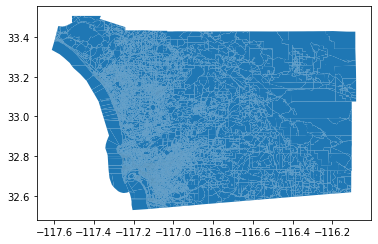

In [38]:
sd_blocks.plot()

In [39]:
# rename column for join
lehd_df.rename(columns={'w_geocode': 'GEOID10'}, inplace=True)
# merge geodataframe and dataframe on common variable
SDlehd_tracts = sd_blocks.merge(lehd_df, on='GEOID10')

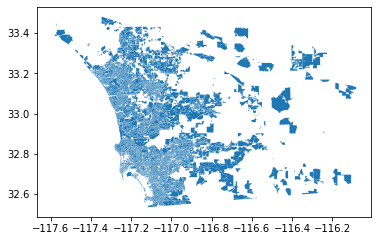

In [40]:
SDlehd_tracts.plot()

In [41]:
SDlehd_tracts

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,CNS03,CNS04,CNS05,CNS06,CNS07,CNS08,CNS09,CNS10,CNS11,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20,CR01,CR02,CR03,CR04,CR05,CR07,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,06,073,013310,2013,060730133102013,Block 2013,G5040,U,78661,U,S,7308,0,+32.6363816,-116.9703056,"POLYGON ((-116.97002 32.63583, -116.97013 32.6...",2,0,0,2,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,20190825
1,06,073,016701,2009,060730167012009,Block 2009,G5040,U,78661,U,S,22568,0,+32.8435707,-116.9558789,"POLYGON ((-116.95483 32.84252, -116.95510 32.8...",2,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,2,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,20190825
2,06,073,016810,1002,060730168101002,Block 1002,G5040,U,78661,U,S,38580,0,+32.8553314,-116.9128833,"POLYGON ((-116.91167 32.85424, -116.91193 32.8...",27,4,19,4,6,6,15,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,1,0,0,0,13,14,10,9,3,1,24,3,0,0,0,0,0,0,0,0,0,0,20190825
3,06,073,016402,1040,060730164021040,Block 1040,G5040,U,78661,U,S,202368,0,+32.8100301,-116.9105220,"POLYGON ((-116.91298 32.81196, -116.91282 32.8...",5,1,3,1,0,3,2,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3,0,2,0,0,0,3,2,1,0,2,1,4,1,0,0,0,0,0,0,0,0,0,0,20190825
4,06,073,008324,2004,060730083242004,Block 2004,G5040,U,78661,U,S,47448,0,+32.9576738,-117.2502740,"POLYGON ((-117.24878 32.95800, -117.24874 32.9...",4,3,1,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,4,0,0,0,0,0,4,0,0,1,0,0,1,3,0,0,0,0,0,0,0,0,0,0,20190825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17700,06,073,018802,2019,060730188022019,Block 2019,G5040,U,78661,U,S,1544485,0,+33.3309179,-117.2034097,"POLYGON ((-117.20373 33.33942, -117.20132 33.3...",17,1,8,8,1,7,9,0,0,0,5,0,7,0,0,0,0,0,5,0,0,0,0,0,0,0,0,14,1,0,1,0,1,13,4,3,6,5,2,12,5,0,0,0,0,0,0,0,0,0,0,20190825
17701,06,073,018801,2023,060730188012023,Block 2023,G5040,U,78661,U,S,362398,0,+33.3506982,-117.2184383,"POLYGON ((-117.22171 33.35046, -117.22171 33.3...",6,3,3,0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,6,0,0,0,0,0,6,0,2,0,1,0,3,3,0,0,0,0,0,0,0,0,0,0,20190825
17702,06,073,019001,2000,060730190012000,Block 2000,G5040,R,None,None,S,4117623,0,+33.4223947,-117.1626505,"POLYGON ((-117.14372 33.43263, -117.14377 33.4...",9,0,5,4,1,6,2,0,0,0,0,0,2,0,0,0,0,5,0,0,0,0,2,0,0,0,0,9,0,0,0,0,0,7,2,0,6,1,2,4,5,0,0,0,0,0,0,0,0,0,0,20190825
17703,06,073,018801,1004,060730188011004,Block 1004,G5040,U,78661,U,S,264242,0,+33.3493579,-117.2468907,"POLYGON ((-117.24800 33.35106, -117.24796 33.3...",393,69,189,135,31,260,102,393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,327,21,9,25,0,11,181,212,111,60,90,63,257,136,0,0,0,0,0,0,0,0,0,0,20190825
